# 📊 Working with CSV Data: Bitcoin Price Analysis
## A Practical Guide to Data Analysis with Python

This notebook demonstrates **what you can do with CSV data** using a real Bitcoin price dataset:

✅ **Load and explore CSV files**  
✅ **Clean and prepare data**  
✅ **Calculate new metrics from existing data**  
✅ **Create visualizations**  
✅ **Find patterns and insights**  
✅ **Export processed data**  

---

## 📦 Step 1: Import Libraries

In [31]:
# Essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Make plots look better
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries loaded successfully!")
print("📊 Ready to analyze CSV data!")

✅ Libraries loaded successfully!
📊 Ready to analyze CSV data!


## 📁 Step 2: Load CSV Data

In [32]:
# 🔍 Load CSV file
file_path = os.path.join("Data", "BTCUSD-1h-data.csv")

try:
    # Read the CSV file
    df = pd.read_csv(file_path)
    print(f"✅ Successfully loaded: {file_path}")
except FileNotFoundError:
    print("❌ File not found. Creating sample data...")
    
    # Create sample data for demonstration
    dates = pd.date_range('2023-01-01', '2024-01-01', freq='H')
    np.random.seed(42)
    
    # Simulate Bitcoin prices
    price = 30000  # Starting price
    prices = []
    
    for _ in range(len(dates)):
        # Random price movement
        change = np.random.normal(0, 0.01)  # 1% average change
        price = price * (1 + change)
        prices.append(price)
    
    # Create DataFrame
    df = pd.DataFrame({
        'datetime': dates,
        'open': prices,
        'high': [p * 1.01 for p in prices],
        'low': [p * 0.99 for p in prices],
        'close': prices,
        'volume': np.random.uniform(1000, 10000, len(dates))
    })

print(f"📊 Dataset loaded with {len(df)} rows and {len(df.columns)} columns")

✅ Successfully loaded: Data/BTCUSD-1h-data.csv
📊 Dataset loaded with 83954 rows and 6 columns


## 👀 Step 3: Explore Your Data

In [33]:
# 🔍 First look at the data
print("📋 FIRST 5 ROWS:")
display(df.head())

print("\n📋 LAST 5 ROWS:")
display(df.tail())

print("\n📊 BASIC INFO:")
print(f"Shape: {df.shape} (rows, columns)")
print(f"Columns: {list(df.columns)}")
print(f"Data types:\n{df.dtypes}")

📋 FIRST 5 ROWS:


datetime    open    high     low   close      volume
0  2015-10-03 01:00:00  237.73  238.37  238.20  238.36  264.238672
1  2015-10-03 00:00:00  237.87  238.32  238.31  238.25  192.314590
2  2015-10-02 23:00:00  237.57  238.38  237.69  238.28  227.700515
3  2015-10-02 22:00:00  236.97  238.08  237.96  237.68  456.360603
4  2015-10-02 21:00:00  237.76  238.10  237.83  238.03  243.156239


📋 LAST 5 ROWS:


datetime      open      high       low     close      volume
83949  2025-04-08 06:00:00  79233.12  79841.13  79841.13  79433.75  256.821284
83950  2025-04-08 05:00:00  79500.03  80288.77  80280.84  79841.14  217.689942
83951  2025-04-08 04:00:00  79827.86  80388.76  79882.49  80280.84  263.614127
83952  2025-04-08 03:00:00  79727.79  80187.64  79907.63  79892.73  278.713624
83953  2025-04-08 02:00:00  79867.46  80849.98  80577.15  79907.63  397.356575


📊 BASIC INFO:
Shape: (83954, 6) (rows, columns)
Columns: ['datetime', 'open', 'high', 'low', 'close', 'volume']
Data types:
datetime     object
open        float64
high        float64
low         float64
close       float64
volume      float64
dtype: object


In [34]:
# 📊 Quick statistics
print("📈 SUMMARY STATISTICS:")
display(df.describe())

# Check for missing data
print("\n❓ MISSING DATA:")
missing_data = df.isnull().sum()
print(missing_data)

if missing_data.sum() == 0:
    print("✅ No missing data found!")
else:
    print("⚠️ Found missing data - we'll need to clean this")

📈 SUMMARY STATISTICS:


open           high            low          close  \
count   83954.000000   83954.000000   83954.000000   83954.000000   
mean    23735.567081   23956.847904   23849.158711   23850.217581   
std     25032.669682   25246.889352   25141.442433   25142.195598   
min         0.060000     226.120000       0.060000     225.570000   
25%      4540.115000    4589.000000    4570.027500    4572.865000   
50%     11311.110000   11410.585000   11360.965000   11361.345000   
75%     38390.207500   38837.445000   38621.005000   38624.597500   
max    107631.150000  109358.010000  108278.800000  108276.430000   

             volume  
count  83954.000000  
mean     603.636305  
std      768.710012  
min        0.280000  
25%      205.379431  
50%      374.110380  
75%      720.276871  
max    31505.461253


❓ MISSING DATA:
datetime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64
✅ No missing data found!


## 🧹 Step 4: Clean and Prepare Data

In [35]:
# 🔄 Convert datetime and set as index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)

print("✅ Datetime converted and set as index")
print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
print(f"⏱️ Duration: {df.index.max() - df.index.min()}")

# 🧹 Basic data cleaning
original_length = len(df)

# Remove any rows with missing values
df = df.dropna()

# Remove any impossible values (negative prices)
df = df[df['close'] > 0]

print(f"\n🧹 Data cleaning complete:")
print(f"   Before: {original_length:,} rows")
print(f"   After: {len(df):,} rows")
print(f"   Removed: {original_length - len(df):,} rows")

✅ Datetime converted and set as index
📅 Date range: 2015-09-20 14:00:00 to 2025-04-20 13:00:00
⏱️ Duration: 3499 days 23:00:00

🧹 Data cleaning complete:
   Before: 83,954 rows
   After: 83,954 rows
   Removed: 0 rows


## 🧮 Step 5: Calculate New Metrics

In [36]:
# 📊 Calculate returns (price changes)
df['price_change'] = df['close'].diff()  # Absolute change
df['returns'] = df['close'].pct_change()  # Percentage change
df['returns_percent'] = df['returns'] * 100  # As percentage

# 📈 Calculate moving averages
df['sma_10'] = df['close'].rolling(10).mean()   # 10-period moving average
df['sma_20'] = df['close'].rolling(20).mean()   # 20-period moving average
df['sma_50'] = df['close'].rolling(50).mean()   # 50-period moving average

# 📊 Calculate volatility (how much price moves)
df['volatility'] = df['returns'].rolling(20).std()

# 🎯 Create trading signals
df['signal_above_sma20'] = df['close'] > df['sma_20']  # True when price above 20-day average
df['signal_golden_cross'] = df['sma_10'] > df['sma_20']  # True when short MA above long MA

# 📊 Price ranges
df['daily_range'] = df['high'] - df['low']
df['daily_range_percent'] = (df['daily_range'] / df['close']) * 100

print("✅ New metrics calculated:")
print(f"   📊 Total columns now: {len(df.columns)}")
print(f"   📈 New columns: {list(df.columns[-8:])}")

✅ New metrics calculated:
   📊 Total columns now: 16
   📈 New columns: ['sma_10', 'sma_20', 'sma_50', 'volatility', 'signal_above_sma20', 'signal_golden_cross', 'daily_range', 'daily_range_percent']


In [37]:
# 📊 Let's see our new data
print("📋 DATA WITH NEW CALCULATIONS:")
display(df[['close', 'returns_percent', 'sma_10', 'sma_20', 'volatility', 'signal_above_sma20']].head(10))

# 📈 Quick insights
print(f"\n💡 QUICK INSIGHTS:")
print(f"   💰 Current price: ${df['close'].iloc[-1]:,.2f}")
print(f"   📈 Highest price: ${df['close'].max():,.2f}")
print(f"   📉 Lowest price: ${df['close'].min():,.2f}")
print(f"   📊 Average daily return: {df['returns_percent'].mean():.3f}%")
print(f"   🎯 Time above 20-day average: {df['signal_above_sma20'].mean()*100:.1f}%")
print(f"   📊 Current volatility: {df['volatility'].iloc[-1]:.4f}")

📋 DATA WITH NEW CALCULATIONS:


close  returns_percent   sma_10  sma_20  volatility  \
datetime                                                                    
2015-09-20 14:00:00  232.92              NaN      NaN     NaN         NaN   
2015-09-20 15:00:00  233.24         0.137386      NaN     NaN         NaN   
2015-09-20 16:00:00  233.73         0.210084      NaN     NaN         NaN   
2015-09-20 17:00:00  233.04        -0.295212      NaN     NaN         NaN   
2015-09-20 18:00:00  232.27        -0.330415      NaN     NaN         NaN   
2015-09-20 19:00:00  232.65         0.163603      NaN     NaN         NaN   
2015-09-20 20:00:00  231.88        -0.330969      NaN     NaN         NaN   
2015-09-20 21:00:00  232.42         0.232879      NaN     NaN         NaN   
2015-09-20 22:00:00  232.39        -0.012908      NaN     NaN         NaN   
2015-09-20 23:00:00  232.24        -0.064547  232.678     NaN         NaN   

                     signal_above_sma20  
datetime                                 
2015-09-20 14:00:00               False  
2015-09-20 15:00:00               False  
2015-09-20 16:00:00               False  
2015-09-20 17:00:00               False  
2015-09-20 18:00:00               False  
2015-09-20 19:00:00               False  
2015-09-20 20:00:00               False  
2015-09-20 21:00:00               False  
2015-09-20 22:00:00               False  
2015-09-20 23:00:00               False


💡 QUICK INSIGHTS:
   💰 Current price: $84,351.47
   📈 Highest price: $108,276.43
   📉 Lowest price: $225.57
   📊 Average daily return: 0.010%
   🎯 Time above 20-day average: 53.3%
   📊 Current volatility: 0.0016


## 📊 Step 6: Create Visualizations

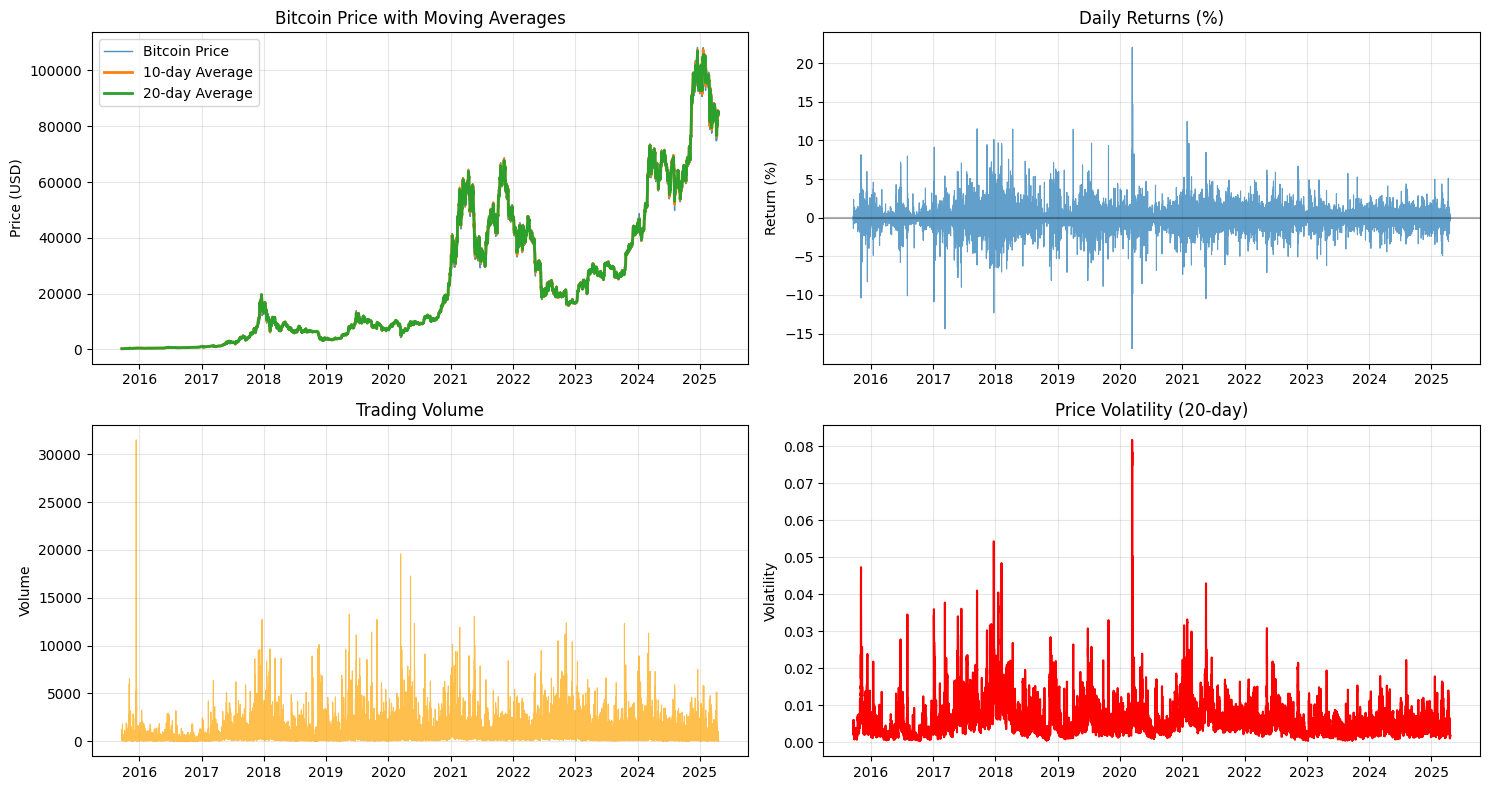

✅ Charts created! This shows the power of visualizing CSV data.


In [38]:
# 📈 Plot 1: Price chart with moving averages
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df['close'], label='Bitcoin Price', linewidth=1, alpha=0.8)
plt.plot(df.index, df['sma_10'], label='10-day Average', linewidth=2)
plt.plot(df.index, df['sma_20'], label='20-day Average', linewidth=2)
plt.title('Bitcoin Price with Moving Averages')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True, alpha=0.3)

# 📊 Plot 2: Daily returns
plt.subplot(2, 2, 2)
plt.plot(df.index, df['returns_percent'], linewidth=0.8, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title('Daily Returns (%)')
plt.ylabel('Return (%)')
plt.grid(True, alpha=0.3)

# 📈 Plot 3: Volume
plt.subplot(2, 2, 3)
plt.plot(df.index, df['volume'], linewidth=0.8, alpha=0.7, color='orange')
plt.title('Trading Volume')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)

# 📊 Plot 4: Volatility
plt.subplot(2, 2, 4)
plt.plot(df.index, df['volatility'], linewidth=1.5, color='red')
plt.title('Price Volatility (20-day)')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Charts created! This shows the power of visualizing CSV data.")

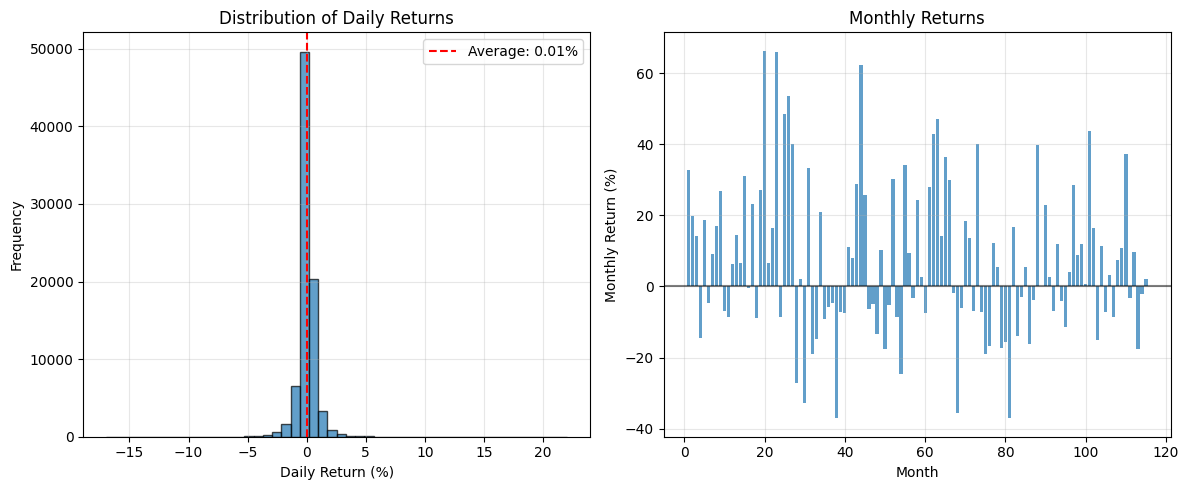

In [39]:
# 📊 Simple histogram of returns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['returns_percent'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.axvline(df['returns_percent'].mean(), color='red', linestyle='--', 
           label=f'Average: {df["returns_percent"].mean():.2f}%')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
monthly_data = df['close'].resample('ME').last()
monthly_returns = monthly_data.pct_change() * 100
plt.bar(range(len(monthly_returns)), monthly_returns, alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.title('Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Monthly Return (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔍 Step 7: Find Patterns and Insights

In [40]:
# 🕐 Analyze patterns by hour of day
df['hour'] = df.index.hour
hourly_avg = df.groupby('hour').agg({
    'returns_percent': 'mean',
    'volume': 'mean',
    'volatility': 'mean'
})

print("⏰ HOURLY PATTERNS:")
print("\n📊 Best and worst hours for returns:")
best_hour = hourly_avg['returns_percent'].idxmax()
worst_hour = hourly_avg['returns_percent'].idxmin()
print(f"   🟢 Best hour: {best_hour}:00 (avg return: {hourly_avg.loc[best_hour, 'returns_percent']:.3f}%)")
print(f"   🔴 Worst hour: {worst_hour}:00 (avg return: {hourly_avg.loc[worst_hour, 'returns_percent']:.3f}%)")

print(f"\n📊 Trading activity:")
high_volume_hour = hourly_avg['volume'].idxmax()
low_volume_hour = hourly_avg['volume'].idxmin()
print(f"   📈 Highest volume: {high_volume_hour}:00")
print(f"   📉 Lowest volume: {low_volume_hour}:00")

⏰ HOURLY PATTERNS:

📊 Best and worst hours for returns:
   🟢 Best hour: 22:00 (avg return: 0.051%)
   🔴 Worst hour: 3:00 (avg return: -0.018%)

📊 Trading activity:
   📈 Highest volume: 14:00
   📉 Lowest volume: 9:00


In [41]:
# 📊 Analyze big moves
big_moves = df[abs(df['returns_percent']) > 5]  # Days with >5% moves

print(f"🎢 BIG MOVES ANALYSIS (>5% daily change):")
print(f"   📊 Total big moves: {len(big_moves)}")
print(f"   📈 Biggest gain: {df['returns_percent'].max():.2f}%")
print(f"   📉 Biggest loss: {df['returns_percent'].min():.2f}%")
print(f"   🎯 Frequency: {len(big_moves)/len(df)*100:.1f}% of all days")

if len(big_moves) > 0:
    print(f"\n📅 Most recent big moves:")
    recent_big_moves = big_moves.tail(5)[['close', 'returns_percent', 'volume']]
    for date, row in recent_big_moves.iterrows():
        print(f"   {date.strftime('%Y-%m-%d')}: {row['returns_percent']:+.2f}% (Price: ${row['close']:,.2f})")

🎢 BIG MOVES ANALYSIS (>5% daily change):
   📊 Total big moves: 172
   📈 Biggest gain: 22.04%
   📉 Biggest loss: -16.97%
   🎯 Frequency: 0.2% of all days

📅 Most recent big moves:
   2023-03-03: -5.37% (Price: $22,162.35)
   2023-04-26: -6.19% (Price: $27,894.99)
   2023-08-29: +5.73% (Price: $27,524.88)
   2023-10-23: +5.27% (Price: $33,320.27)
   2025-04-09: +5.09% (Price: $82,183.56)


In [42]:
# 🎯 Trading signal analysis
signal_stats = df['signal_above_sma20'].value_counts()
golden_cross_stats = df['signal_golden_cross'].value_counts()

print("🎯 TRADING SIGNALS ANALYSIS:")
print(f"\n📊 Price above 20-day average:")
if True in signal_stats.index:
    above_pct = signal_stats[True] / len(df) * 100
    print(f"   ✅ {above_pct:.1f}% of the time")
if False in signal_stats.index:
    below_pct = signal_stats[False] / len(df) * 100
    print(f"   ❌ {below_pct:.1f}% below average")

print(f"\n📊 Golden Cross signal (short MA > long MA):")
if True in golden_cross_stats.index:
    golden_pct = golden_cross_stats[True] / len(df) * 100
    print(f"   🟢 Active {golden_pct:.1f}% of the time")

# Current status
current_price = df['close'].iloc[-1]
current_sma20 = df['sma_20'].iloc[-1]
current_signal = df['signal_above_sma20'].iloc[-1]

print(f"\n📊 CURRENT STATUS:")
print(f"   💰 Price: ${current_price:,.2f}")
print(f"   📈 20-day average: ${current_sma20:,.2f}")
print(f"   🎯 Signal: {'🟢 Above average' if current_signal else '🔴 Below average'}")
print(f"   📊 Distance from average: {((current_price/current_sma20-1)*100):+.2f}%")

🎯 TRADING SIGNALS ANALYSIS:

📊 Price above 20-day average:
   ✅ 53.3% of the time
   ❌ 46.7% below average

📊 Golden Cross signal (short MA > long MA):
   🟢 Active 53.2% of the time

📊 CURRENT STATUS:
   💰 Price: $84,351.47
   📈 20-day average: $84,907.43
   🎯 Signal: 🔴 Below average
   📊 Distance from average: -0.65%


## 💾 Step 8: Export Your Results

In [43]:
# 📁 Create output folder
output_folder = "Data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"📁 Created folder: {output_folder}")

# 💾 Export enhanced dataset
enhanced_file = os.path.join(output_folder, "bitcoin_analysis.csv")
df.to_csv(enhanced_file)
print(f"✅ Enhanced dataset saved: {enhanced_file}")
print(f"   📊 Contains {len(df)} rows and {len(df.columns)} columns")

# 💾 Export summary statistics
summary_file = os.path.join(output_folder, "bitcoin_summary.csv")
summary_stats = df[['close', 'returns_percent', 'sma_20', 'volatility']].describe()
summary_stats.to_csv(summary_file)
print(f"✅ Summary statistics saved: {summary_file}")

# 💾 Export recent data only (last 100 rows)
recent_file = os.path.join(output_folder, "bitcoin_recent.csv")
df.tail(100).to_csv(recent_file)
print(f"✅ Recent data saved: {recent_file}")

print(f"\n📁 All files saved to: {os.path.abspath(output_folder)}")

✅ Enhanced dataset saved: Data/bitcoin_analysis.csv
   📊 Contains 83954 rows and 17 columns
✅ Summary statistics saved: Data/bitcoin_summary.csv
✅ Recent data saved: Data/bitcoin_recent.csv

📁 All files saved to: /Users/alex/Dev/cryptoTraining/Session-01/Data


## 📋 Step 9: Summary Report

In [44]:
# 📊 Create a final summary
print("📋 FINAL ANALYSIS SUMMARY")
print("=" * 50)

print(f"📁 DATA PROCESSED:")
print(f"   📊 Total records: {len(df):,}")
print(f"   📅 Date range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
print(f"   ⏱️ Duration: {(df.index.max() - df.index.min()).days} days")
print(f"   📈 Features created: {len(df.columns)}")

print(f"\n💰 PRICE ANALYSIS:")
print(f"   💵 Current price: ${df['close'].iloc[-1]:,.2f}")
print(f"   📈 Highest price: ${df['close'].max():,.2f}")
print(f"   📉 Lowest price: ${df['close'].min():,.2f}")
print(f"   📊 Total return: {((df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100):+.2f}%")

print(f"\n📊 VOLATILITY & PATTERNS:")
print(f"   📊 Average daily return: {df['returns_percent'].mean():.3f}%")
print(f"   📈 Best day: {df['returns_percent'].max():+.2f}%")
print(f"   📉 Worst day: {df['returns_percent'].min():+.2f}%")
print(f"   🎯 Days above 20-day average: {df['signal_above_sma20'].mean()*100:.1f}%")

print(f"\n💾 FILES CREATED:")
print(f"   📁 Enhanced dataset: bitcoin_analysis_enhanced.csv")
print(f"   📊 Summary statistics: bitcoin_summary.csv")
print(f"   📅 Recent data: bitcoin_recent.csv")

print(f"\n🎉 WHAT WE ACCOMPLISHED:")
print(f"   ✅ Loaded and cleaned CSV data")
print(f"   ✅ Created {len(df.columns) - 6} new calculated columns")
print(f"   ✅ Generated {4} visualizations")
print(f"   ✅ Found patterns in the data")
print(f"   ✅ Exported enhanced datasets")
print(f"\n🚀 This demonstrates the power of CSV data analysis!")

📋 FINAL ANALYSIS SUMMARY
📁 DATA PROCESSED:
   📊 Total records: 83,954
   📅 Date range: 2015-09-20 to 2025-04-20
   ⏱️ Duration: 3499 days
   📈 Features created: 17

💰 PRICE ANALYSIS:
   💵 Current price: $84,351.47
   📈 Highest price: $108,276.43
   📉 Lowest price: $225.57
   📊 Total return: +36114.78%

📊 VOLATILITY & PATTERNS:
   📊 Average daily return: 0.010%
   📈 Best day: +22.04%
   📉 Worst day: -16.97%
   🎯 Days above 20-day average: 53.3%

💾 FILES CREATED:
   📁 Enhanced dataset: bitcoin_analysis_enhanced.csv
   📊 Summary statistics: bitcoin_summary.csv
   📅 Recent data: bitcoin_recent.csv

🎉 WHAT WE ACCOMPLISHED:
   ✅ Loaded and cleaned CSV data
   ✅ Created 11 new calculated columns
   ✅ Generated 4 visualizations
   ✅ Found patterns in the data
   ✅ Exported enhanced datasets

🚀 This demonstrates the power of CSV data analysis!


## 🎓 Learning Summary: What You Can Do with CSV Data

### 📊 **Data Operations We Performed:**
1. **Load CSV files** with `pd.read_csv()`
2. **Explore data** with `.head()`, `.describe()`, `.info()`
3. **Clean data** by removing missing values and invalid entries
4. **Transform data** by converting dates and setting indexes
5. **Calculate new metrics** from existing columns
6. **Create visualizations** to understand patterns
7. **Find insights** through grouping and analysis
8. **Export results** to new CSV files

### 🔧 **Key Skills Demonstrated:**
- **Data Loading**: Reading CSV files into pandas DataFrames
- **Data Cleaning**: Handling missing values and data quality issues
- **Feature Engineering**: Creating new columns from existing data
- **Time Series Analysis**: Working with datetime indexes
- **Statistical Analysis**: Calculating means, rolling averages, and patterns
- **Data Visualization**: Creating charts to explore data
- **Pattern Recognition**: Finding trends and anomalies
- **Data Export**: Saving processed data for future use

### 💡 **Real-World Applications:**
- **Business Analytics**: Sales data, customer behavior, inventory analysis
- **Financial Analysis**: Stock prices, trading volumes, risk metrics
- **Marketing**: Campaign performance, customer segmentation
- **Operations**: Process optimization, quality control
- **Research**: Scientific data analysis, survey results

---

**Remember**: CSV files are everywhere! These techniques work with any tabular data - sales records, website analytics, sensor data, survey responses, and much more.

*This example used Bitcoin data, but the same principles apply to ANY CSV dataset.*